# <b>Data Understanding</b>

In [1]:
import datetime  #for timedelta in histogram

import numpy as np
import pandas
import geopandas as gpd
import json

from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot
from bokeh.plotting import figure, show

from bokeh.models import (ColumnDataSource,
                          Select,
                          NumeralTickFormatter,
                          GeoJSONDataSource,
                          LinearColorMapper,
                          ColorBar)

from bokeh.models.tools import HoverTool
from bokeh.models.widgets import (DataTable,
                                  TableColumn,
                                  HTMLTemplateFormatter)

from bokeh.layouts import column, row
from bokeh.palettes import Spectral4, brewer
from bokeh.tile_providers import get_provider, Vendors

from bokeh.io import output_notebook, push_notebook

import seaborn

seaborn.set(style='whitegrid')
output_notebook()
%matplotlib inline

Loading BokehJS ...

Getting Johns Hopkins data from github:<br>
first time: `git clone https://github.com/CSSEGISandData/COVID-19.git`<br>
`git pull https://github.com/CSSEGISandData/COVID-19.git`

In [2]:
# loading the time series data also containing population size
df_with_pop = pandas.read_csv('../data/processed/time_series_with_pop.csv', skipinitialspace=True)

In [3]:
df_with_pop.head()

,date,Angola,Botswana,Burundi,Congo (Kinshasa),Eritrea,Eswatini,Ethiopia,Kenya,Madagascar,...,Somalia,South Africa,Tanzania,Uganda,Zambia,Zimbabwe,China,Singapore,"Korea, South",Germany
0,NaN,30.81,2.26,11.2,84.07,3.22,1.14,109.2,51.39,26.26,...,15.0,57.78,56.32,42.72,17.35,14.4,1393.0,5.54,51.64,83.02
1,2020-01-22,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,...,0.0,0.00,0.00,0.00,0.00,0.0,548.0,0.00,1.00,0.00
2,2020-01-23,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,...,0.0,0.00,0.00,0.00,0.00,0.0,643.0,1.00,1.00,0.00
3,2020-01-24,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,...,0.0,0.00,0.00,0.00,0.00,0.0,920.0,3.00,2.00,0.00
4,2020-01-25,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,...,0.0,0.00,0.00,0.00,0.00,0.0,1406.0,3.00,2.00,0.00


In [4]:
country_df = pandas.read_csv('../data/raw/countries_pertinent.csv', skipinitialspace=True)

country_df2 = country_df.copy()
country_df2 = country_df2.set_index('country')
country_df2 = country_df2.drop('China', axis=0)
country_df2 = country_df2.drop('Korea, South', axis=0)
country_df2 = country_df2.reset_index()
country_list = country_df2['country']
population_size = country_df2['population']

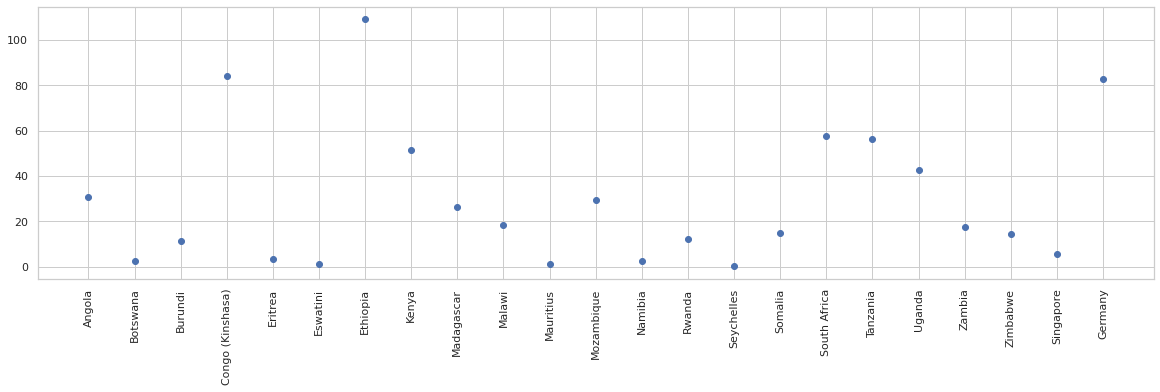

In [5]:
pyplot.figure(figsize=(20, 5))
pyplot.scatter(country_list, population_size)
pyplot.xticks(rotation=90);

In [6]:
scatter_fig1 = figure(x_range=country_list) # x_range = ... to inform Bokeh that the x-axis is categorical

scatter_fig1.scatter(country_list,
                    population_size,
                     radius=0.4,
                     fill_alpha=0.6,
                     line_color=None)
#fill_color = list of color
scatter_fig1.xaxis.major_label_orientation = np.pi/2
show(scatter_fig1)


In [7]:
# creating DataFrame with total number of cases
df_raw = pandas.read_csv('../data/raw/raw_time_series.csv', skipinitialspace=False)

df_raw['date'] = pandas.to_datetime(df_raw['date'], format='%Y-%m-%d')

df_raw2 = df_raw.copy()
df_raw2 = df_raw2.drop('Korea, South', axis=1)
df_total_cases = pandas.DataFrame()
#df_total_cases['date'] =  df_raw2['date']
for country in country_df2['country']:
    df_total_cases[country] = df_raw2[country]
    #df_total_cases[country] = [np.array(df_raw2[country].sum(axis=0))]
## df_raw already contains the cumulative total number of cases on the given day

In [8]:
df_raw.tail()

,date,Angola,Botswana,Burundi,Congo (Kinshasa),Eritrea,Eswatini,Ethiopia,Kenya,Madagascar,...,Somalia,South Africa,Tanzania,Uganda,Zambia,Zimbabwe,China,Singapore,"Korea, South",Germany
174,2020-07-14,541,399,269,8135,232,1434,7969,10791,5343,...,3076,298292,509,1040,1895,1064,85226,46630,13551,200456
175,2020-07-15,576,399,269,8163,232,1489,8181,11252,5605,...,3083,311049,509,1043,1895,1089,85246,46878,13612,200890
176,2020-07-16,607,522,303,8199,251,1552,8475,11673,6089,...,3106,324221,509,1051,1895,1362,85314,47126,13672,201450
177,2020-07-17,638,522,310,8249,251,1619,8803,12062,6467,...,3106,337594,509,1056,2810,1420,85314,47453,13711,202045
178,2020-07-18,687,522,310,8324,251,1729,9147,12750,6849,...,3111,350879,509,1062,2980,1478,85314,47655,13745,202426


In [9]:
df_total_cases.tail()

,Angola,Botswana,Burundi,Congo (Kinshasa),Eritrea,Eswatini,Ethiopia,Kenya,Madagascar,Malawi,...,Rwanda,Seychelles,Somalia,South Africa,Tanzania,Uganda,Zambia,Zimbabwe,Singapore,Germany
174,541,399,269,8135,232,1434,7969,10791,5343,2497,...,1416,100,3076,298292,509,1040,1895,1064,46630,200456
175,576,399,269,8163,232,1489,8181,11252,5605,2614,...,1435,100,3083,311049,509,1043,1895,1089,46878,200890
176,607,522,303,8199,251,1552,8475,11673,6089,2712,...,1473,108,3106,324221,509,1051,1895,1362,47126,201450
177,638,522,310,8249,251,1619,8803,12062,6467,2805,...,1485,108,3106,337594,509,1056,2810,1420,47453,202045
178,687,522,310,8324,251,1729,9147,12750,6849,2810,...,1539,108,3111,350879,509,1062,2980,1478,47655,202426


In [10]:
pandas.set_option('display.max_columns', 90)

In [11]:
df_raw.tail()

,date,Angola,Botswana,Burundi,Congo (Kinshasa),Eritrea,Eswatini,Ethiopia,Kenya,Madagascar,Malawi,Mauritius,Mozambique,Namibia,Rwanda,Seychelles,Somalia,South Africa,Tanzania,Uganda,Zambia,Zimbabwe,China,Singapore,"Korea, South",Germany
174,2020-07-14,541,399,269,8135,232,1434,7969,10791,5343,2497,342,1268,864,1416,100,3076,298292,509,1040,1895,1064,85226,46630,13551,200456
175,2020-07-15,576,399,269,8163,232,1489,8181,11252,5605,2614,343,1330,960,1435,100,3083,311049,509,1043,1895,1089,85246,46878,13612,200890
176,2020-07-16,607,522,303,8199,251,1552,8475,11673,6089,2712,343,1383,1032,1473,108,3106,324221,509,1051,1895,1362,85314,47126,13672,201450
177,2020-07-17,638,522,310,8249,251,1619,8803,12062,6467,2805,343,1402,1078,1485,108,3106,337594,509,1056,2810,1420,85314,47453,13711,202045
178,2020-07-18,687,522,310,8324,251,1729,9147,12750,6849,2810,343,1435,1203,1539,108,3111,350879,509,1062,2980,1478,85314,47655,13745,202426


In [12]:
#pyplot.figure(figsize=(20, 15))
#pyplot.scatter(country_list, df_total_cases.T[0])
#pyplot.xticks(rotation=90);

#we are going to use bokeh instead

In [13]:
df_total_cases.shape

(179, 23)

In [14]:
scatter_fig2 = figure(x_range=country_list) # x_range = ... to inform Bokeh that the x-axis is categorical

scatter_fig2.scatter(country_list,
                    df_total_cases.T[df_total_cases.shape[0]-1],
                     radius=0.2,
                     fill_alpha=0.6,
                     line_color=None)
#fill_color = list of color
scatter_fig2.xaxis.major_label_orientation = np.pi/2
show(scatter_fig2)

In [15]:
#### Standardising population size and cases numbers
scaler_pop_size = StandardScaler()
scaler_cases = StandardScaler()
scaler_pop_size.fit(np.array(country_df2['population']).reshape(-1, 1))
scaler_cases.fit(np.array(df_total_cases.T[df_total_cases.shape[0]-1]).reshape(-1, 1))

StandardScaler()

In [16]:
print(scaler_pop_size)
print(scaler_cases)

StandardScaler()
StandardScaler()


In [17]:
scaled_pop = scaler_pop_size.transform(np.array(country_df2['population']).reshape(-1, 1))
scaled_cases = scaler_cases.transform(np.array(df_total_cases.T[df_total_cases.shape[0]-1]).reshape(-1, 1))

In [18]:
scaled_pop

array([[ 0.04783772],
       [-0.89861116],
       [-0.60224503],
       [ 1.81343728],
       [-0.86678661],
       [-0.9357398 ],
       [ 2.6465112 ],
       [ 0.73007653],
       [-0.10299739],
       [-0.37218005],
       [-0.93143023],
       [ 0.00441047],
       [-0.89231255],
       [-0.5657794 ],
       [-0.9702164 ],
       [-0.47627285],
       [ 0.94190869],
       [ 0.89350886],
       [ 0.44266105],
       [-0.398369  ],
       [-0.4961632 ],
       [-0.78987728],
       [ 1.77862918]])

In [19]:
scaled_cases

array([[-0.34821101],
       [-0.35026838],
       [-0.35291179],
       [-0.25298597],
       [-0.35364745],
       [-0.33521841],
       [-0.24272406],
       [-0.1977986 ],
       [-0.27137761],
       [-0.32173952],
       [-0.35250031],
       [-0.33888427],
       [-0.34177705],
       [-0.3375875 ],
       [-0.35543051],
       [-0.31798638],
       [ 4.01830017],
       [-0.35043048],
       [-0.34353517],
       [-0.31961981],
       [-0.33834811],
       [ 0.23742857],
       [ 2.16725365]])

In [20]:
#pyplot.figure(figsize=(20, 15))
#pyplot.scatter(scaled_pop, scaled_cases)
#pyplot.xlabel('population size', fontsize=15)
#pyplot.ylabel('cases number', fontsize=15);

# we are going to use bokeh instead

In [21]:
scaled_pop.shape

(23, 1)

In [22]:
scaled_pop.reshape(scaled_pop.shape[0])

array([ 0.04783772, -0.89861116, -0.60224503,  1.81343728, -0.86678661,
       -0.9357398 ,  2.6465112 ,  0.73007653, -0.10299739, -0.37218005,
       -0.93143023,  0.00441047, -0.89231255, -0.5657794 , -0.9702164 ,
       -0.47627285,  0.94190869,  0.89350886,  0.44266105, -0.398369  ,
       -0.4961632 , -0.78987728,  1.77862918])

In [23]:
scatter_fig3 = figure() # x_range = ... to inform Bokeh that the x-axis is categorical

scatter_fig3.scatter(scaled_pop.T.reshape(scaled_pop.shape[0]),
                     scaled_cases.T.reshape(scaled_pop.shape[0]),
                     radius=0.05,
                     fill_alpha=0.6,
                     line_color=None)
#fill_color = list of color
scatter_fig3.xaxis.major_label_orientation = np.pi/2
show(scatter_fig3)


### <b><font color='green'>The number of cases are not related to population size at first look.</font></b>

### <b>Active Cases</b>

In [24]:
df_reco = pandas.read_csv('../data/processed/time_series_recovered.csv', skipinitialspace=True)
df_deaths = pandas.read_csv('../data/processed/time_series_deaths.csv', skipinitialspace=True)
df_active = pandas.read_csv('../data/processed/time_series_active.csv', skipinitialspace=False)

df_active['date'] = pandas.to_datetime(df_active['date'], format='%Y-%m-%d')
df_deaths['date'] = pandas.to_datetime(df_deaths['date'], format='%Y-%m-%d')
df_reco['date'] = pandas.to_datetime(df_reco['date'], format='%Y-%m-%d')

In [25]:
df_reco.tail()

,date,Angola,Botswana,Burundi,Congo (Kinshasa),Eritrea,Eswatini,Ethiopia,Kenya,Madagascar,Malawi,Mauritius,Mozambique,Namibia,Rwanda,Seychelles,Somalia,South Africa,Tanzania,Uganda,Zambia,Zimbabwe,China,Singapore,"Korea, South",Germany
174,2020-07-14,118,38,207,3948,107,695,2430,3017,2646,795,330,373,29,737,11,1380,146279,183,984,1412,343,79967,42737,12348,185100
175,2020-07-15,124,38,207,3983,107,724,2430,3068,2811,1005,331,375,31,752,27,1425,160693,183,1004,1412,395,80005,42988,12396,186000
176,2020-07-16,124,48,207,4248,149,736,2430,3638,2951,1073,331,375,31,770,27,1444,165591,183,1014,1412,425,80018,43256,12460,186400
177,2020-07-17,199,48,207,4248,155,769,2430,3983,3108,1107,331,397,32,811,27,1444,178183,183,1023,1450,438,80018,43577,12519,186900
178,2020-07-18,210,48,207,4313,155,788,2430,4440,3339,1111,331,408,32,819,27,1452,182230,183,1023,1462,439,80018,43833,12556,187200


In [26]:
df_deaths.tail()

,date,Angola,Botswana,Burundi,Congo (Kinshasa),Eritrea,Eswatini,Ethiopia,Kenya,Madagascar,Malawi,Mauritius,Mozambique,Namibia,Rwanda,Seychelles,Somalia,South Africa,Tanzania,Uganda,Zambia,Zimbabwe,China,Singapore,"Korea, South",Germany
174,2020-07-14,26,1,1,190,0,20,139,202,39,40,10,9,2,4,0,93,4346,21,0,42,20,4642,27,289,9078
175,2020-07-15,27,1,1,192,0,20,146,209,43,43,10,9,2,4,0,93,4453,21,0,42,20,4644,27,291,9080
176,2020-07-16,28,1,1,193,0,21,148,217,53,51,10,9,2,4,0,93,4669,21,0,42,23,4644,27,293,9087
177,2020-07-17,29,1,1,193,0,21,150,222,54,55,10,9,2,4,0,93,4804,21,0,109,24,4644,27,294,9088
178,2020-07-18,29,1,1,193,0,21,163,225,55,55,10,10,2,5,0,93,4948,21,0,120,25,4644,27,295,9091


In [27]:
df_active.tail()

,date,Angola,Botswana,Burundi,Congo (Kinshasa),Eritrea,Eswatini,Ethiopia,Kenya,Madagascar,Malawi,Mauritius,Mozambique,Namibia,Rwanda,Seychelles,Somalia,South Africa,Tanzania,Uganda,Zambia,Zimbabwe,China,Singapore,"Korea, South",Germany
174,2020-07-14,397,360,61,3997,125,719,5400,7572,2658,1662,2,886,833,675,89,1603,147667,305,56,441,701,617,3866,914,6278
175,2020-07-15,425,360,61,3988,125,745,5605,7975,2751,1566,2,946,927,679,73,1565,145903,305,39,441,674,597,3863,925,5810
176,2020-07-16,455,473,95,3758,102,795,5897,7818,3085,1588,2,999,999,699,81,1569,153961,305,37,441,914,652,3843,919,5963
177,2020-07-17,410,473,102,3808,96,829,6223,7857,3305,1643,2,996,1044,670,81,1569,154607,305,33,1251,958,652,3849,898,6057
178,2020-07-18,448,473,102,3818,96,920,6554,8085,3455,1644,2,1017,1169,715,81,1566,163701,305,39,1398,1014,652,3795,894,6135


In [28]:
df_active.columns.values

array(['date', 'Angola', 'Botswana', 'Burundi', 'Congo (Kinshasa)',
       'Eritrea', 'Eswatini', 'Ethiopia', 'Kenya', 'Madagascar', 'Malawi',
       'Mauritius', 'Mozambique', 'Namibia', 'Rwanda', 'Seychelles',
       'Somalia', 'South Africa', 'Tanzania', 'Uganda', 'Zambia',
       'Zimbabwe', 'China', 'Singapore', 'Korea, South', 'Germany'],
      dtype=object)

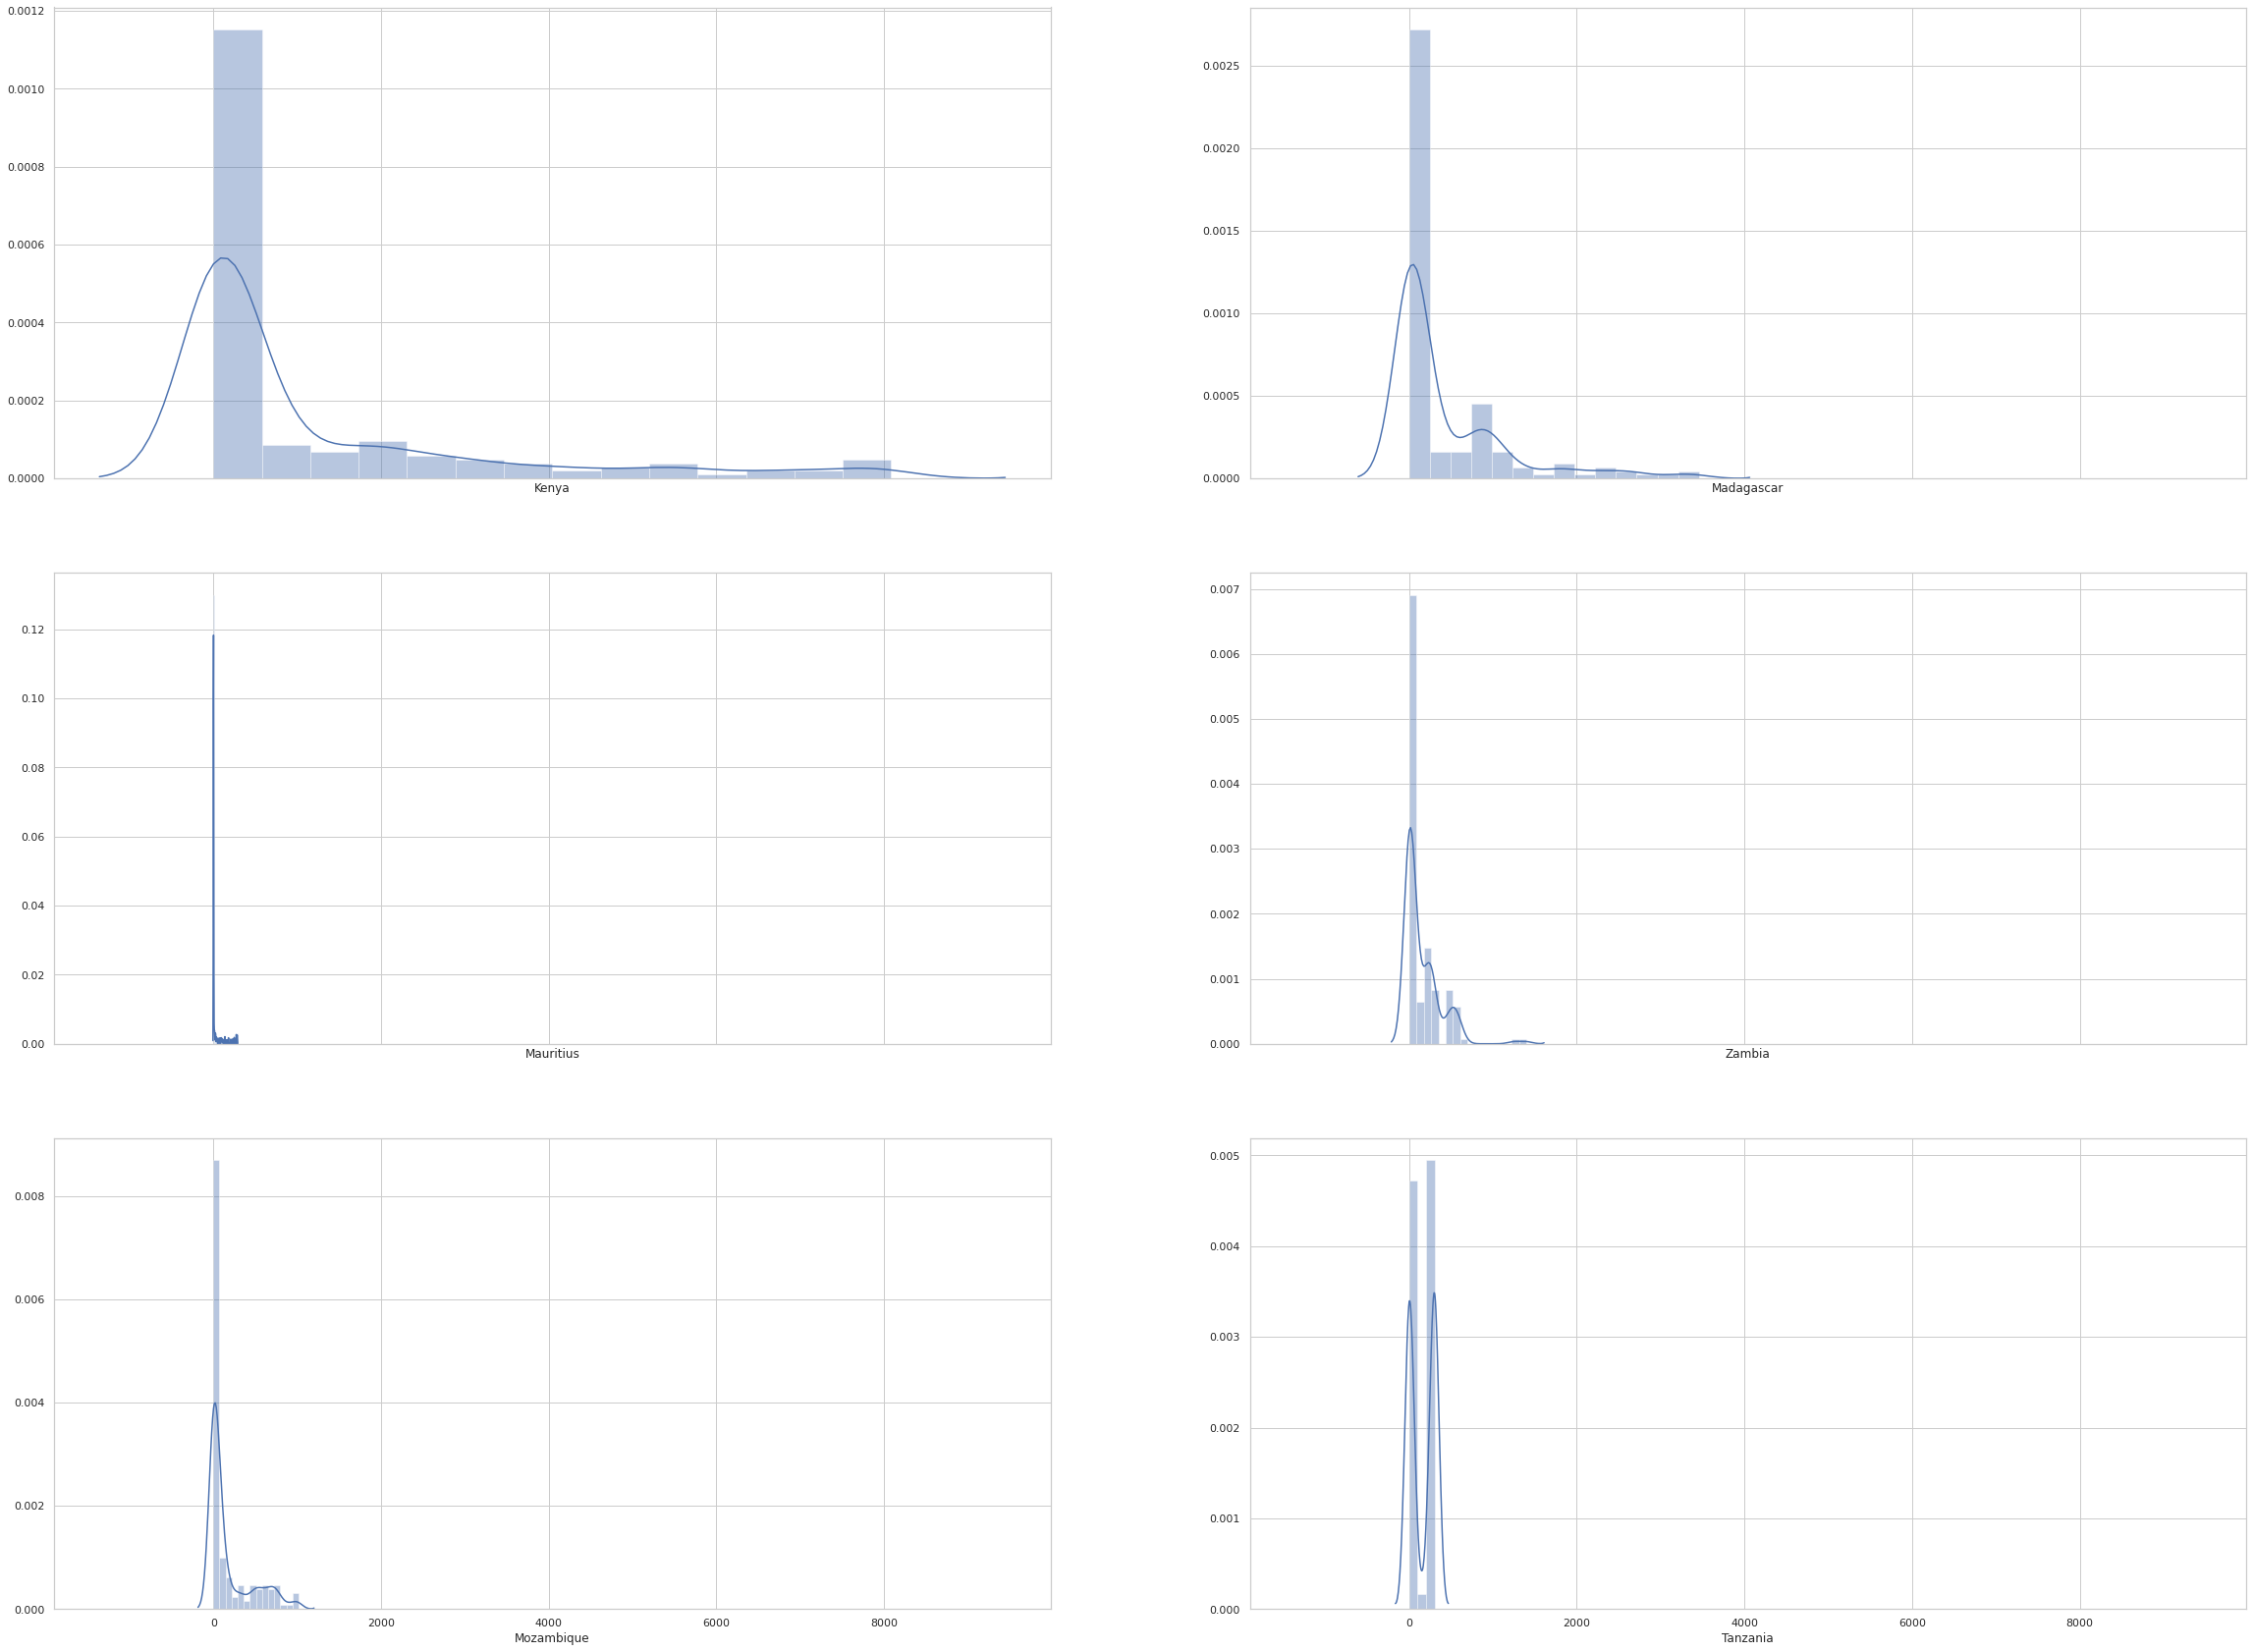

In [29]:
test_list = ['Kenya',
             'Madagascar',
             'Mauritius',
             'Zambia',
             'Mozambique',
             'Tanzania']

fig, axes = pyplot.subplots(3, 2, figsize=(40, 30), sharex=True)

count = 0
for i in range(3):
    for j in range(2):
        seaborn.distplot(df_active[test_list[count]], ax=axes[i, j])
        count +=1

fig.savefig("../docs/active_distplot.png")

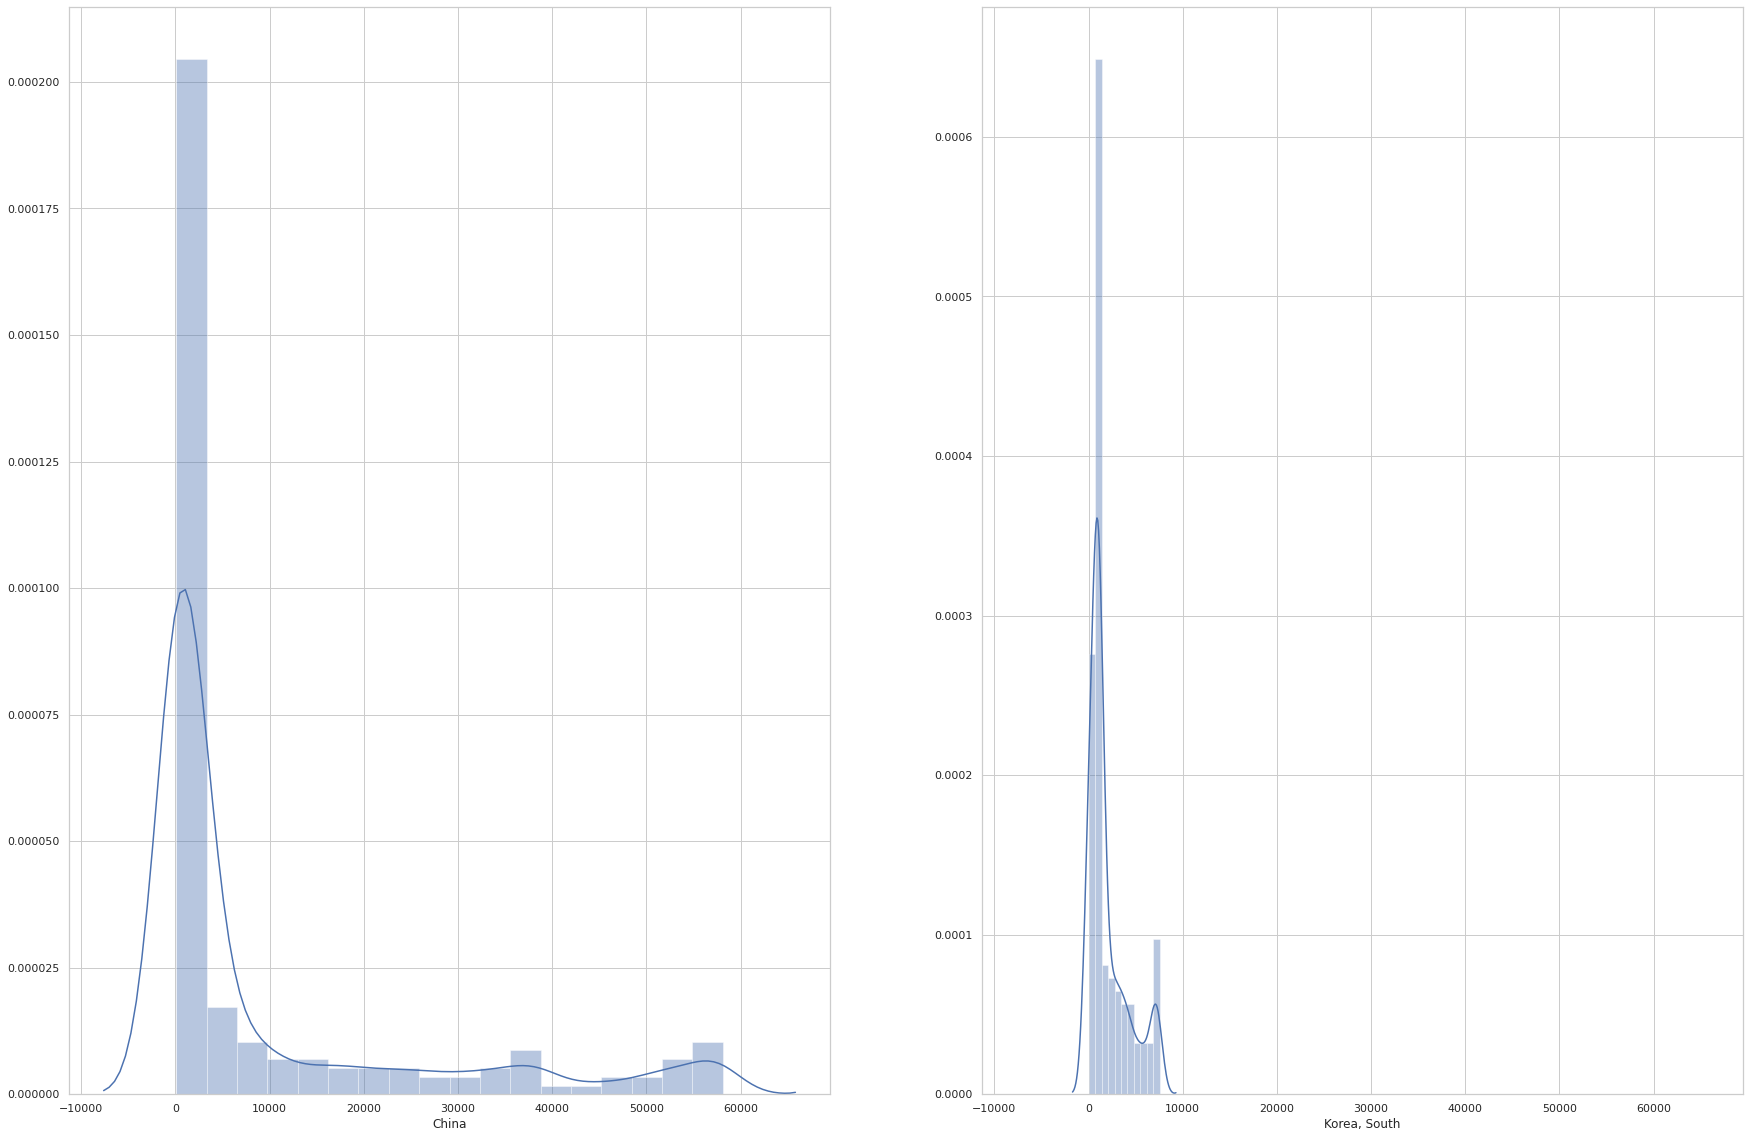

In [30]:
fig, axes = pyplot.subplots(1, 2, figsize=(30, 20), sharex=True)
seaborn.distplot(df_active['China'], ax=axes[0])
seaborn.distplot(df_active['Korea, South'], ax=axes[1])
fig.savefig("../docs/China_SKorea_Active_dist.png")

<Figure size 432x288 with 0 Axes>

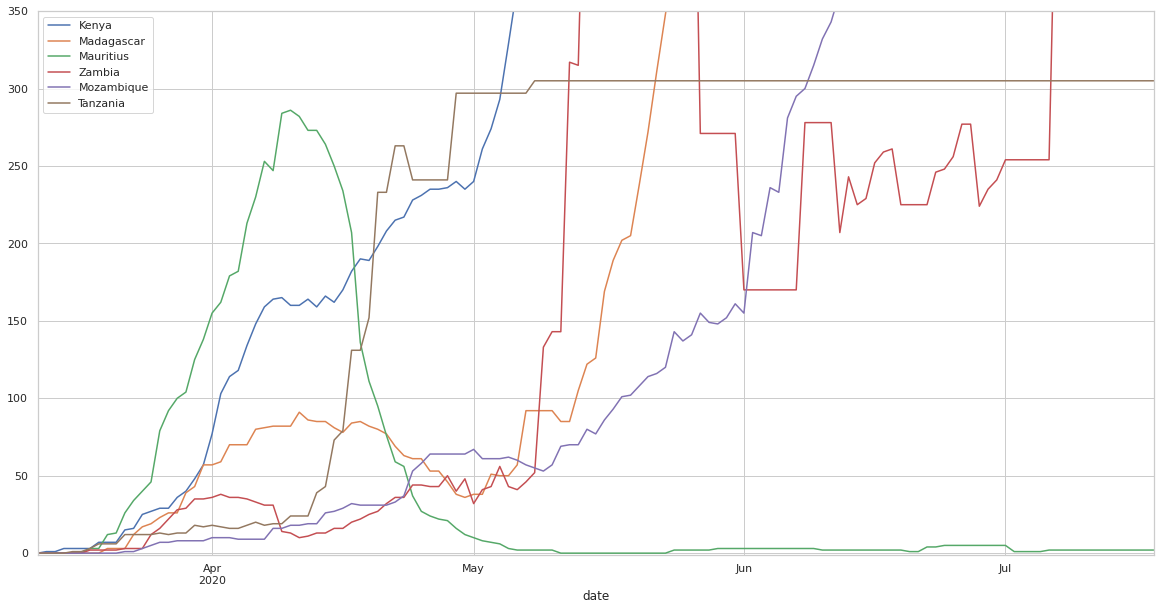

In [31]:
pyplot.figure();
test_list_date = ['date']
test_list_date.extend(test_list)
df_active[test_list_date].iloc[50:, :].set_index('date').plot(figsize=(20,10));
pyplot.ylim(-1, 350);
#pyplot.xticks(ticks=range(len(df_active.index)-50), labels=df_active['date'], rotation=90);

In [32]:
fig2 = figure(x_axis_type='datetime', plot_width=1000, plot_height=400)
ys = [df_active[country] for country in test_list]
xs = [df_active['date'] for _ in test_list]
fig2.multi_line(xs,
                ys,
                line_color=['green', 'blue', 'brown', 'orange', 'cyan', 'purple'],
                line_width=2
                )
show(fig2)

In [33]:
#we need to plot each curve separately to add legend
source = ColumnDataSource(df_active)
fig2 = figure(x_axis_type='datetime', plot_width=1000, plot_height=400)

plot = {}
for country, color in zip(test_list, Spectral4):
    plot[country] = fig2.line(x='date',
                              y=country,
                              source=source,
                              color=color,
                              legend_label=country,
                              line_width=3
                             )
    hover = HoverTool(renderers=[plot[country]],
                      tooltips=[('', '@date{%F}'),                          
                                ('', country),
                                ('', 'active cases $y{int}')],
                      formatters={'@date': 'datetime'}
                     )
    fig2.add_tools(hover)
    fig2.circle(x='date',
                y=country,
                source=source,
                color=color,
                size=8
                 )

fig2.legend.location = "top_left"
fig2.legend.click_policy="hide"
show(fig2)

### Creating a bokeh function plotting the column of a data frame specified in a list

In [34]:
def bokeh_plot_country(df, columns_list):
    ''' Plot DataFrame columns using bokeh.
    Parameters:
    ----------
           df (pandas.DataFrame): data frame containing the times series as columns
           country_list (list): list of county to be plotted
    
    Return: None
    ------
    '''
    source = ColumnDataSource(df)

    #we need to plot each curve separately to add legend
    fig = figure(x_axis_type='datetime', plot_width=1000, plot_height=400)

    plot = {}
    for item, color in zip(columns_list, Spectral4):
        plot[item] = fig.line(x='date',
                                  y=item,
                                  source=source,
                                  color=color,
                                  legend_label=item,
                                  line_width=3
                                 )
        hover = HoverTool(renderers=[plot[item]],
                          tooltips=[('', '@date{%F}'),                          
                                    ('', item),
                                    ('', 'cases @{}{{int}}'.format(item))],
                          formatters={'@date': 'datetime'}
                         )
        fig.add_tools(hover)
        fig.circle(x='date',
                    y=item,
                    source=source,
                    color=color,
                    size=8
                     )
    fig.xaxis.major_label_orientation = np.pi/2
    fig.legend.location = "top_left"
    fig.legend.click_policy="hide"
    show(fig)
    

In [35]:
bokeh_plot_country(df_active, test_list)

In [36]:
asia_list =  ['China', 'Singapore', 'Korea, South']

In [37]:
bokeh_plot_country(df_active, asia_list)

In [38]:
df_mg = pandas.DataFrame()
df_mg['date'] = df_active['date']
df_mg['confirmed'] = df_raw['Madagascar']
df_mg['active'] = df_active['Madagascar']
df_mg['recovered'] = df_reco['Madagascar']
df_mg['death'] = df_deaths['Madagascar']
df_mg.tail()

,date,confirmed,active,recovered,death
174,2020-07-14,5343,2658,2646,39
175,2020-07-15,5605,2751,2811,43
176,2020-07-16,6089,3085,2951,53
177,2020-07-17,6467,3305,3108,54
178,2020-07-18,6849,3455,3339,55


In [39]:
df_mg.columns.values[1:]

array(['confirmed', 'active', 'recovered', 'death'], dtype=object)

In [40]:
bokeh_plot_country(df_mg, list(df_mg.columns.values[1:]))

In [41]:
df_ke = pandas.DataFrame()
df_ke['date'] = df_active['date']
df_ke['confirmed'] = df_raw['Kenya']
df_ke['active'] = df_active['Kenya']
df_ke['recovered'] = df_reco['Kenya']
df_ke['death'] = df_deaths['Kenya']
df_ke.tail()

,date,confirmed,active,recovered,death
174,2020-07-14,10791,7572,3017,202
175,2020-07-15,11252,7975,3068,209
176,2020-07-16,11673,7818,3638,217
177,2020-07-17,12062,7857,3983,222
178,2020-07-18,12750,8085,4440,225


In [42]:
bokeh_plot_country(df_ke, list(df_ke.columns.values[1:]))

### <b>The daily rate of increase</b>

In [43]:
df_daily_reco = pandas.read_csv('../data/processed/time_series_daily_recovered.csv', skipinitialspace=True)
df_daily_deaths = pandas.read_csv('../data/processed/time_series_daily_deaths.csv', skipinitialspace=True)
df_daily_active = pandas.read_csv('../data/processed/time_series_daily_active.csv', skipinitialspace=True)
df_daily_new = pandas.read_csv('../data/processed/time_series_daily_new.csv', skipinitialspace=True)

df_daily_reco['date'] = pandas.to_datetime(df_daily_reco['date'], format='%Y-%m-%d')
df_daily_deaths['date'] = pandas.to_datetime(df_daily_deaths['date'], format='%Y-%m-%d')
df_daily_active['date'] = pandas.to_datetime(df_daily_active['date'], format='%Y-%m-%d')
df_daily_new['date'] = pandas.to_datetime(df_daily_new['date'], format='%Y-%m-%d')

In [44]:
df_daily_reco.head()

,date,Angola,Botswana,Burundi,Congo (Kinshasa),Eritrea,Eswatini,Ethiopia,Kenya,Madagascar,Malawi,Mauritius,Mozambique,Namibia,Rwanda,Seychelles,Somalia,South Africa,Tanzania,Uganda,Zambia,Zimbabwe,China,Singapore,"Korea, South",Germany
0,2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,28,0,0,0
1,2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0
2,2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0
3,2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0
4,2020-01-26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0


In [45]:
bokeh_plot_country(df_daily_reco, test_list)

In [46]:
bokeh_plot_country(df_daily_deaths, test_list)

In [47]:
bokeh_plot_country(df_daily_active, test_list)

In [48]:
bokeh_plot_country(df_daily_new, test_list)

In [49]:
bokeh_plot_country(df_daily_new, ['China'])

### <b>Histograms Perspective</b>

#### New cases

In [50]:
df_daily_new.tail()

,date,Angola,Botswana,Burundi,Congo (Kinshasa),Eritrea,Eswatini,Ethiopia,Kenya,Madagascar,Malawi,Mauritius,Mozambique,Namibia,Rwanda,Seychelles,Somalia,South Africa,Tanzania,Uganda,Zambia,Zimbabwe,China,Singapore,"Korea, South",Germany
174,2020-07-14,16,0,0,60,0,45,203,497,263,67,0,49,3,38,0,4,10496,0,11,0,30,109,347,39,276
175,2020-07-15,35,0,0,28,0,55,212,461,262,117,1,62,96,19,0,7,12757,0,3,0,25,20,248,61,434
176,2020-07-16,31,123,34,36,19,63,294,421,484,98,0,53,72,38,8,23,13172,0,8,0,273,68,248,60,560
177,2020-07-17,31,0,7,50,0,67,328,389,378,93,0,19,46,12,0,0,13373,0,5,915,58,0,327,39,595
178,2020-07-18,49,0,0,75,0,110,344,688,382,5,0,33,125,54,0,5,13285,0,6,170,58,0,202,34,381


In [51]:
def histo_from_df(country, df):
    '''Creates an histogram of new cases per day for country
    Parameters:
    ----------
        country (str): name of the country
        df (pandas.DataFrame): dataframe of new cases, active cases, new death etc...
    Returns:
    --------
        None'''
    source = ColumnDataSource(df)
    plot_new = figure(x_axis_type='datetime',
                      plot_width=1000,
                      plot_height=400,
                      title=f'{country} cases per day')
    
    #use .vbar for vertical bar
    plot_new.vbar(x='date',
                  source=source,
                  bottom=0,
                  top=country,
                  width=datetime.timedelta(days=0.5))
    
    # string formater does not work with @ when there is space in the variable (ex country)
#     hover = HoverTool(tooltips=[('', '@date{%F}'),  
#                                 ('', 'cases $y{int}')],
#                       formatters={'@date': 'datetime'}
#                      )
    tooltips = '''<table><tbody>
                        <tr style="background-color:#0275d8;color:#f7f7f7"><td colspan="2">@date{%F}</td></tr>
                        <tr style="background-color:#808080;color:#f7f7f7"><td>cases</td><td>  $y{int}</td></tr>
                  </tbody></table>
               '''
    hover = HoverTool(tooltips=tooltips,
                      formatters={'@date': 'datetime'}
                     )

    plot_new.add_tools(hover)      
    show(plot_new) # ('', 'cases '+'@'+'{}'.format(country)+'{int}')],

In [52]:
histo_from_df('Madagascar', df_daily_new)

#### Confirmed cases (cumulative) plus curves of death cumulative

In [53]:
histo_from_df('Madagascar', df_raw)

#### Daily deaths

In [54]:
histo_from_df('Korea, South', df_daily_deaths)

#### Daily recovered

In [55]:
histo_from_df('Madagascar', df_daily_reco)

#### Daily death, recovered, and new cases stacked

In [56]:
def stacked_histo(country):
    '''Creates stacked histogram
    Parameters:
    -----------
        country (str): name of the country, name must match a data frame column name
    Returns:
    -------
    '''
    df = pandas.DataFrame()
    df['date'] = df_daily_active['date']
    df['deaths'] = df_daily_deaths[country]
    df['new'] = df_daily_new[country]
    df['recovered'] = df_daily_reco[country]

    source = ColumnDataSource(df)

    histo = figure(x_axis_type='datetime',
                   plot_width=1000,
                   plot_height=400,
                   title=f'{country} deaths, recovered and active cases'
                  )

    histo.vbar_stack(['deaths', 'new', 'recovered'],
                     x='date',
                     color=['red', '#f0ad4e', 'green'],
                     source=source,
                     width=datetime.timedelta(days=0.5),
                     legend_label=['new deaths', 'new cases', 'new recovered'])    #[f'{x} cases' for x in df.columns.values[1:]])

    tooltips = '''<table>
                    <tr style="background-color:#0275d8;color:#f7f7f7"><td colspan="2" style="text-align:center">@date{%F}</td></tr>
                    <tr style="background-color:#5cb85c;color:#f7f7f7"><td>new recovered</td><td>   @recovered{int}</td></tr>
                    <tr style="background-color:#f0ad4e;color:#f7f7f7"><td>new active</td><td>   @new{int}</td></tr>
                    <tr style="background-color:#d9534f;color:#f7f7f7"><td>new deaths</td><td>  @deaths{int}</td></tr>
                  </table>
           '''
    hover = HoverTool(tooltips=tooltips,
                      formatters={'@date': 'datetime'}
                     )

    histo.add_tools(hover)

    histo.legend.location = "top_left"

    show(histo)

In [57]:
stacked_histo('South Africa')

In [58]:
stacked_histo('Madagascar')

In [59]:
stacked_histo('Korea, South')

In [60]:
stacked_histo('Singapore')

In [61]:
stacked_histo('China')

### <b>Creating a dashboard</b>

In [62]:
country_full_list = list(df_raw.columns.values[1:])
 
# we need to use bokeh server for the dash_histo callback to work
#----------------------------------------------------------------

#country_select = Select(value='Zambia', title='Choose Country', options=country_full_list)
#country = Select.value
#
#def dash_histo(attr, old, new):    
#    histo_from_df(country, df_daily_new)

#country_select.on_change('value', dash_histo)
#push_notebook()
#show(country_select)

In [63]:
country_all_pertinent = pandas.read_csv('../data/raw/countries_pertinent.csv', skipinitialspace=True)

In [64]:
country_all_pertinent

,country,population
0,Angola,30.81
1,Botswana,2.26
2,Burundi,11.20
3,Congo (Kinshasa),84.07
4,Eritrea,3.22
5,Eswatini,1.14
6,Ethiopia,109.20
7,Kenya,51.39
8,Madagascar,26.26
9,Malawi,18.14


In [65]:
list(country_all_pertinent['country'])

['Angola',
 'Botswana',
 'Burundi',
 'Congo (Kinshasa)',
 'Eritrea',
 'Eswatini',
 'Ethiopia',
 'Kenya',
 'Madagascar',
 'Malawi',
 'Mauritius',
 'Mozambique',
 'Namibia',
 'Rwanda',
 'Seychelles',
 'Somalia',
 'South Africa',
 'Tanzania',
 'Uganda',
 'Zambia',
 'Zimbabwe',
 'China',
 'Singapore',
 'Korea, South',
 'Germany']

#### <b>Summary bar graph</b>

In [66]:
df_raw['Kenya'][-1:]

178    12750
Name: Kenya, dtype: int64

In [67]:
df_active['Kenya'][-1:]

178    8085
Name: Kenya, dtype: int64

In [68]:
int(df_reco['Kenya'][-1:])

4440

In [69]:
int(df_deaths['Kenya'][-1:])

225

In [70]:
def summary_number(country):
#     df_summary = pandas.DataFrame()
#     df_summary['confirmed'] = [int(df_raw[country][-1:])]
#     df_summary['active'] = [int(df_active[country][-1:])]
#     df_summary['recovered'] = [int(df_reco[country][-1:])]
#     df_summary['deaths'] = [int(df_deaths[country][-1:])]
    
    summary = {}
    summary['confirmed'] = [int(df_raw[country][-1:])]
    summary['active'] = [int(df_active[country][-1:])]
    summary['recovered'] = [int(df_reco[country][-1:])]
    summary['deaths'] = [int(df_deaths[country][-1:])]


    table_source = ColumnDataSource(summary)
    
    template = '<font size=5><%= value %></font>'
    columns = [
               TableColumn(field='confirmed',
                           title='Total confirmed',
                           formatter = HTMLTemplateFormatter(template=template)),
               TableColumn(field='recovered',
                           title='Total recovered',
                           formatter = HTMLTemplateFormatter(template=template)),
               TableColumn(field='active',
                           title='Total active',
                           formatter = HTMLTemplateFormatter(template=template)),
               TableColumn(field='deaths',
                           title='Total deaths',
                          formatter = HTMLTemplateFormatter(template=template)),
              ]

    summary_table = DataTable(source=table_source, columns=columns, height=50, index_position=None)
    show(column(summary_table))
    
    

In [71]:
summary_number('Madagascar')

In [72]:
summary_number('Kenya')

In [73]:
def histo_summary(country):
    cases_label = ['recovered', 'active', 'deaths']
    counts = [int(df_reco[country][-1:]),
              int(df_active[country][-1:]),
              int(df_deaths[country][-1:])]

    summary_source = ColumnDataSource(data=dict(cases_label=cases_label,
                                                counts=counts,
                                                color=['#5cb85c', '#f0ad4e', '#d9534f']))
    summary_histo = figure(x_range=cases_label,
                           plot_width=400,
                           plot_height=300,
                           title='Covid-19 Total Summary'
                          )

    summary_histo.vbar(x='cases_label',
                       top='counts',
                       color='color',
                       source=summary_source,
                       legend_field='cases_label',
                       width=0.8)
    tooltips =  '''<table>
                    <tr style="background-color:#00003f;color:#f7f7f7"><td colspan="2" style="text-align:center;
                    font-weight:bold;text-transform:uppercase">{}</td></tr>
                    <tr style="background-color:@color;color:#f7f7f7;font-weight:bold">
                        <td>@cases_label</td><td> @counts{{int}}</td></tr>
                      </table>
               '''.format(country)

    hover = HoverTool(tooltips=tooltips)
#    hover = HoverTool(tooltips=[('', '@cases_label: @counts{int}')])

    summary_histo.add_tools(hover)
    
    summary_histo.toolbar.logo = None
    summary_histo.toolbar_location = None
    summary_histo.xaxis.group_text_font_size = '26px'
    #summary_histo.xaxis.visible = False
    #summary_histo.yaxis.visible = False
    summary_histo.xgrid.grid_line_color = None
    summary_histo.legend.location = 'top_center'
    summary_histo.legend.orientation = 'horizontal'
    show(summary_histo)


In [74]:
histo_summary('Kenya')

## <b>Interactive map</b>

In [75]:
# loading csv data
country_africa = pandas.read_csv('../data/raw/countries_africa_data.csv',
                                 skipinitialspace=True,
                                 keep_default_na=False) # prevent NA from becoming NaN

### <b>Creating a map using shapefiles</b>

In [76]:
#loading the shapefile
shapefile = '../data/processed/final_covid_geodata.shp'
final_gdf = gpd.read_file(shapefile)

In [77]:
geosource = GeoJSONDataSource(geojson = final_gdf.to_json())

In [78]:
from bokeh.palettes import brewer

coord_source = ColumnDataSource(country_africa)

test_map = figure(title='Situation map',
                  x_range=(8, 68),
                  y_range=(-36, 26),
                  tools=''
                 )

palette = brewer['YlGnBu'][8]
palette = palette[::-1]
vals = final_gdf['active'] 
color_mapper = LinearColorMapper(palette = palette, low = vals.min(), high = vals.max())
color_bar = ColorBar(color_mapper=color_mapper, location=(0,30))
# label for colorbar is not supported yet
test_map.add_layout(color_bar, 'right')


test_map.patches('xs','ys', source = geosource,
                  fill_color = {'field':'active', 'transform':color_mapper},
                  line_color = 'black', 
                  line_width = 0.3, 
                  fill_alpha = 1)

test_map.circle(x='longitude',
                 y='latitude',
                 source=coord_source,
                 color='red',
                 size='severity')

test_map.toolbar.logo = None
test_map.toolbar_location = None
test_map.xaxis.visible = False
test_map.yaxis.visible = False

tooltips =  '''<table>
                    <tr style="background-color:#00003f;color:#f7f7f7"><td colspan="2" style="text-align:center;
                    font-weight:bold;text-transform:uppercase">@country</td></tr>
                    <tr style="background-color:#0275d8;color:#f7f7f7"><td>Cumulative cases</td><td>   @confirmed{int}</td></tr>
                    <tr style="background-color:#5cb85c;color:#f7f7f7"><td>Recovered</td><td>   @recovered{int}</td></tr>
                    <tr style="background-color:#f0ad4e;color:#f7f7f7"><td>Active</td><td>   @active{int}</td></tr>
                    <tr style="background-color:#d9534f;color:#f7f7f7"><td>Deaths</td><td>  @deaths{int}</td></tr>
                  </table>
           '''

hover = HoverTool(tooltips=tooltips)
test_map.add_tools(hover)
show(test_map)

### <b>Creating a map using a map provider instead</b>

In [79]:
map_provider = get_provider(Vendors.CARTODBPOSITRON)

In [80]:
type(map_provider)

bokeh.models.tiles.WMTSTileSource

In [81]:
#coord_source = ColumnDataSource(data=dict(x=country_africa['x'], y=country_africa['y']))
coord_source = ColumnDataSource(country_africa)

covid_map = figure(title='Situation map',
                   x_range=(-400000, 7000000),
                   y_range=(-1600000, 500000),
                   x_axis_type='mercator',
                   y_axis_type='mercator',
                   plot_width=500,
                   plot_height=500,)

tooltips =  '''<table>
                    <tr style="background-color:#00003f;color:#f7f7f7"><td colspan="2" style="text-align:center;
                    font-weight:bold;text-transform:uppercase">@country</td></tr>
                    <tr style="background-color:#0275d8;color:#f7f7f7"><td>Cumulative cases</td><td>   @confirmed{int}</td></tr>
                    <tr style="background-color:#5cb85c;color:#f7f7f7"><td>Recovered</td><td>   @recovered{int}</td></tr>
                    <tr style="background-color:#f0ad4e;color:#f7f7f7"><td>Active</td><td>   @active{int}</td></tr>
                    <tr style="background-color:#d9534f;color:#f7f7f7"><td>Deaths</td><td>  @deaths{int}</td></tr>
                  </table>
           '''

hover = HoverTool(tooltips=tooltips)

covid_map.add_tools(hover)

covid_map.add_tile(map_provider)
covid_map.circle(x='x',
                 y='y',
                 source=coord_source,
                 color='red',
                 size='severity')


show(covid_map)